# LEAD SCORING

OBJECTIVE
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



##   Data load and  basic library import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv(r"D:\DIGANTH RAI\upgrad\lead score assignment\Lead Scoring Assignment\Leads.csv")


In [4]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###  Here we get to know the different type of data types, and number rows that are not null

In [5]:
data.shape

(9240, 37)

# Data cleaning

In [6]:
# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Sort the null percentage values in descending order
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Display the sorted null percentage values
sorted_null_percentage


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

####  Eliminate the columns having greater than 40% missing values as they would not usefull for the model.

In [7]:
# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Drop columns with more than 30% null values
columns_to_drop = null_percentage[null_percentage > 40].index
df = data.drop(columns=columns_to_drop)

# Display the dataset information after dropping columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
pd.set_option('display.max_columns', None)
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,NaN,NaN,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,NaN,NaN,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,NaN,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,NaN,Mumbai,No,No,Email Opened


In [9]:
# Display unique values in each column of the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in Prospect ID:
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Unique values in Lead Number:
[660737 660728 660727 ... 579545 579538 579533]

Unique values in Lead Origin:
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Unique values in Lead Source:
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Unique values in Do Not Email:
['No' 'Yes']

Unique values in Do Not Call:
['No' 'Yes']

Unique values in Converted:
[0 1]

Unique values in TotalVisits:
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  1

###  Observe that if a column has only one unique value, it means that the column does not provide any variability in the data, and thus, it won't contribute useful information for modeling. Therefore, you can consider dropping such columns.

In [10]:
# Identify columns with only one unique value
single_unique_columns = df.columns[df.nunique() == 1]

# Drop columns with only one unique value
df = df.drop(columns=single_unique_columns)

# Display the dataset information after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
df.shape

(9240, 27)

### Few columns still have missing values , lets vizualize them first.

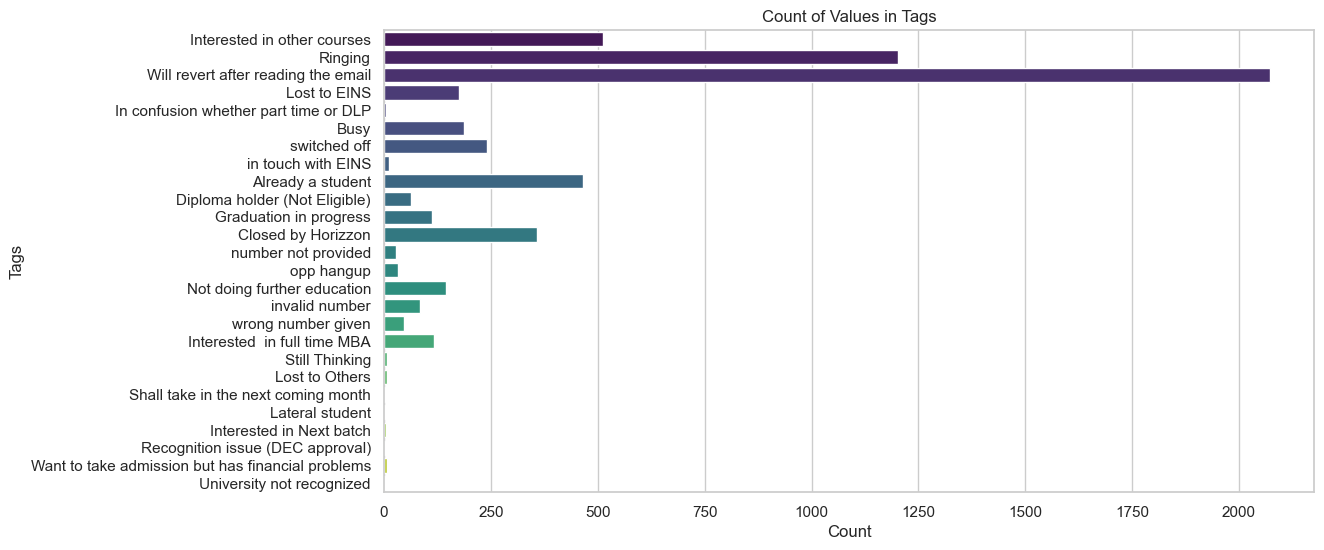

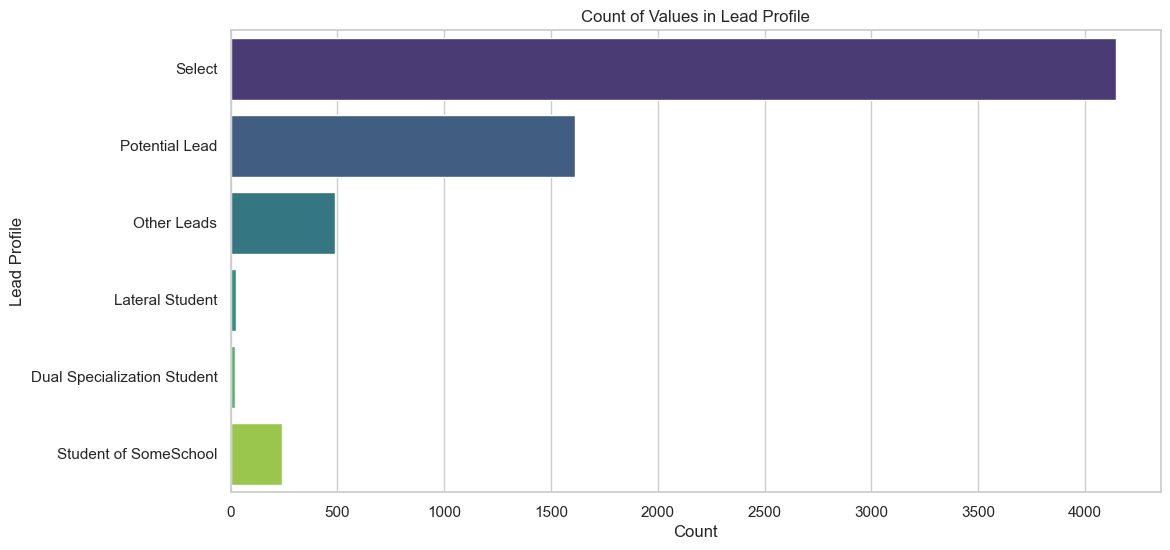

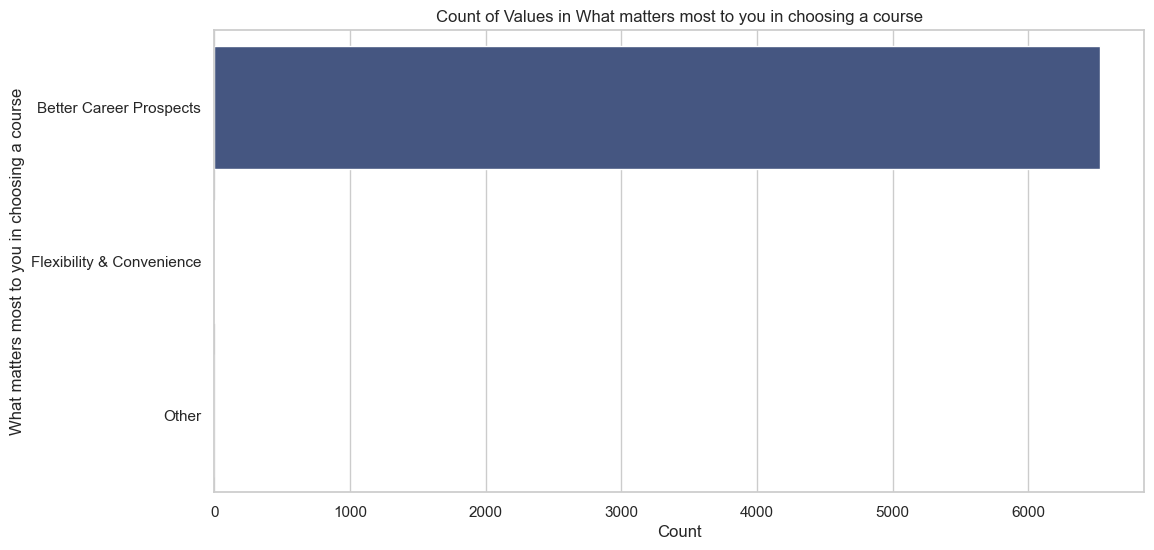

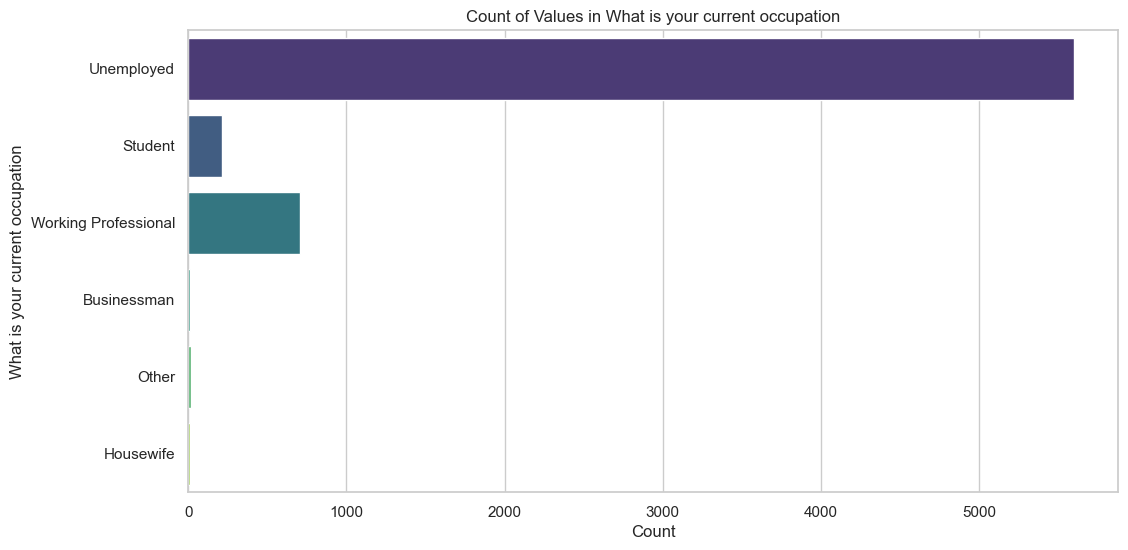

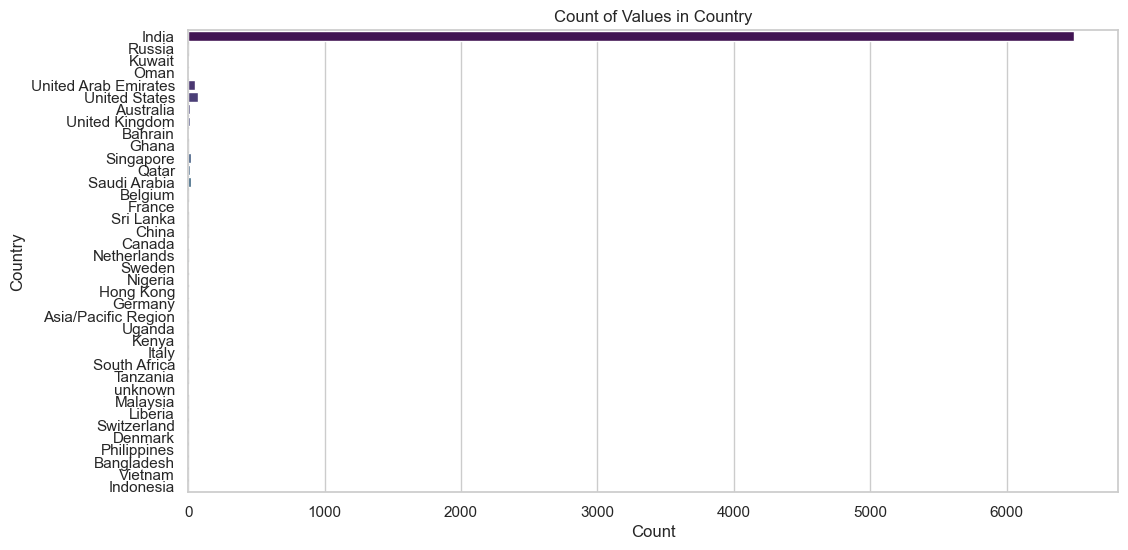

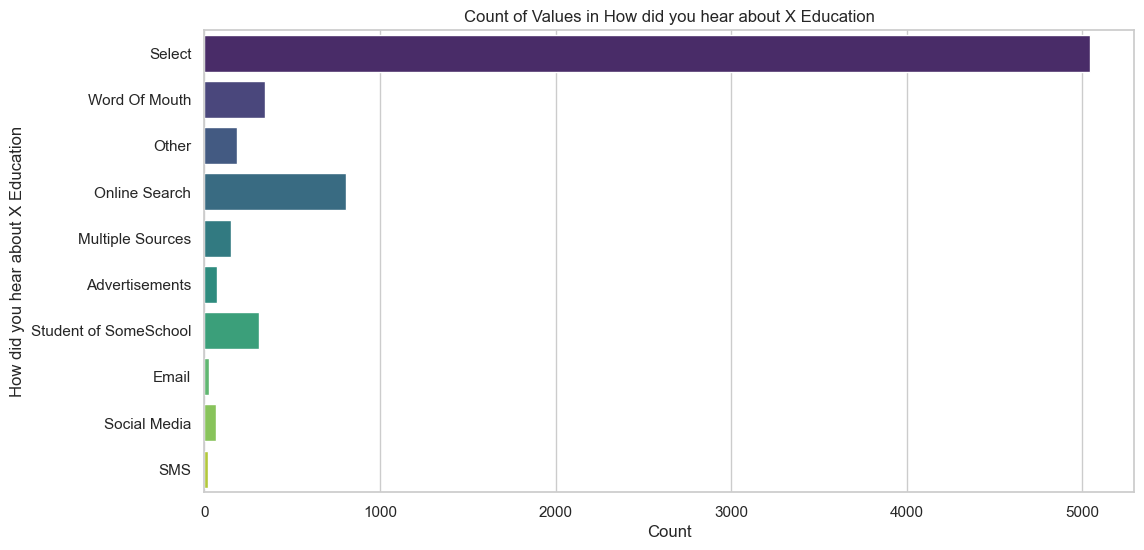

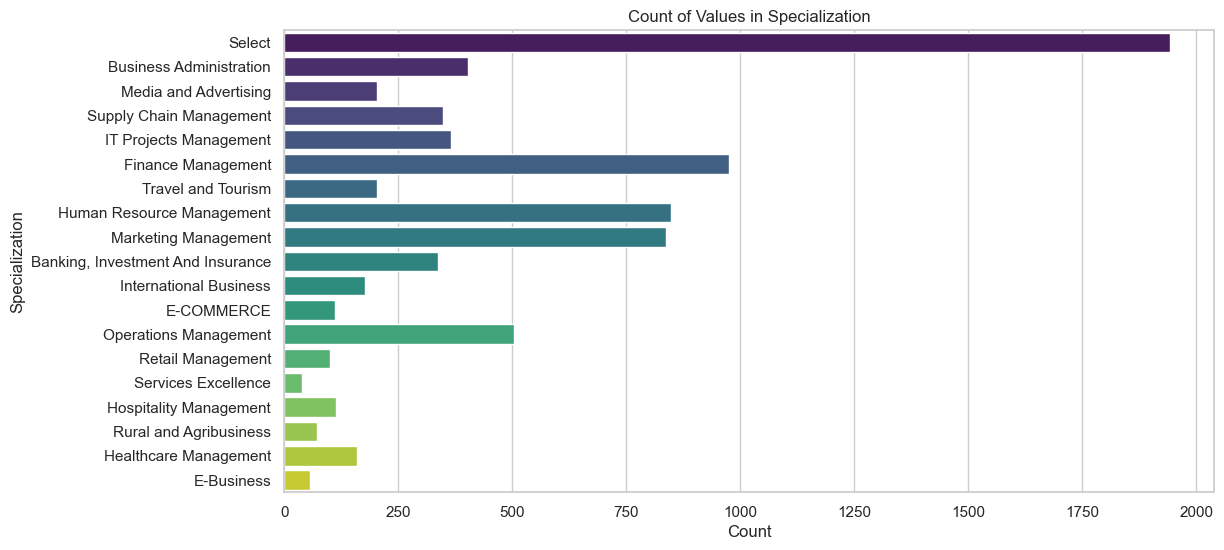

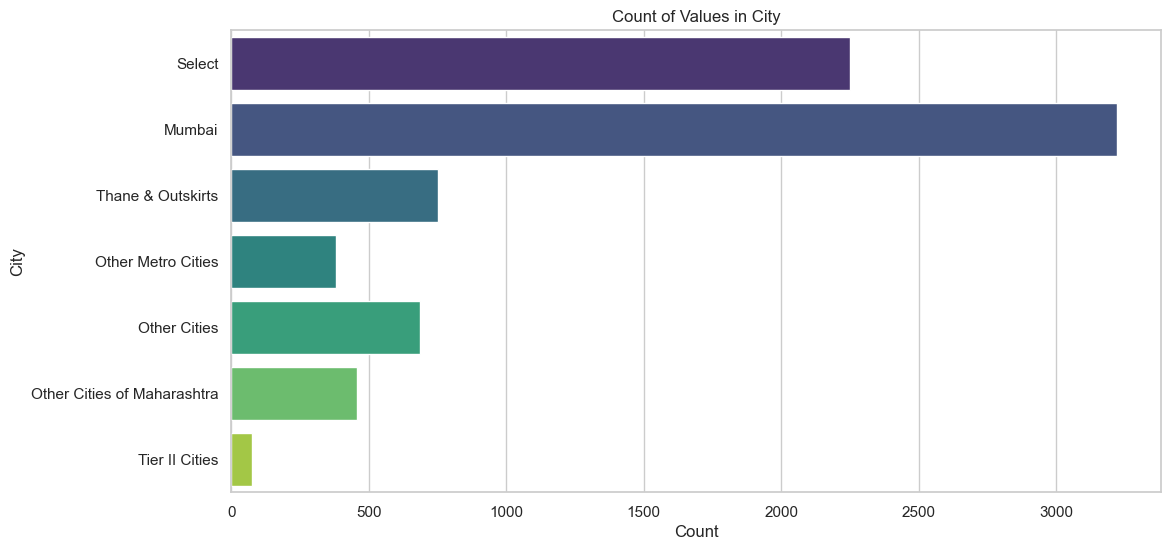

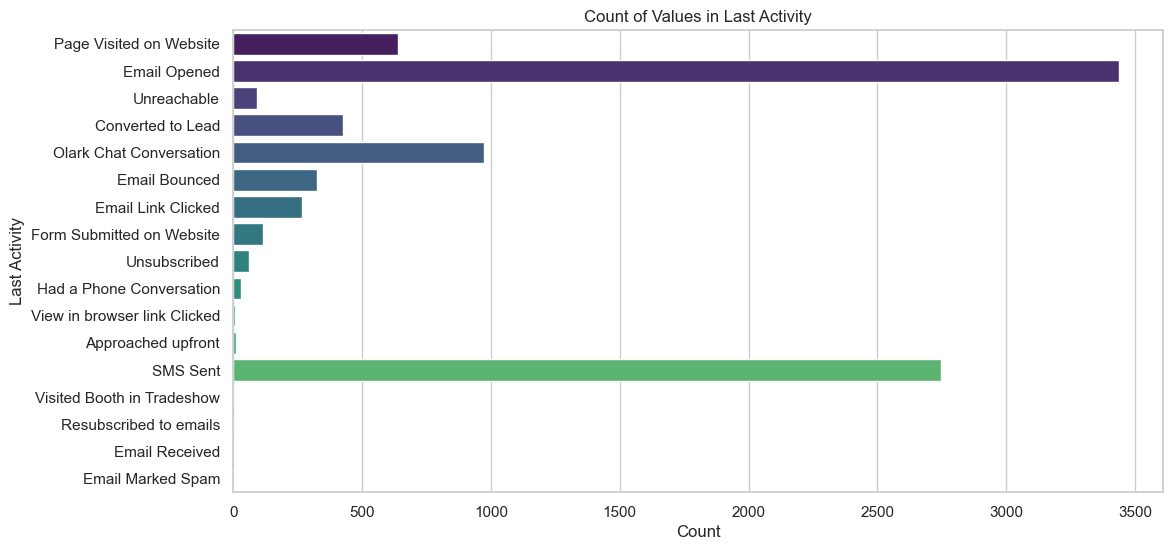

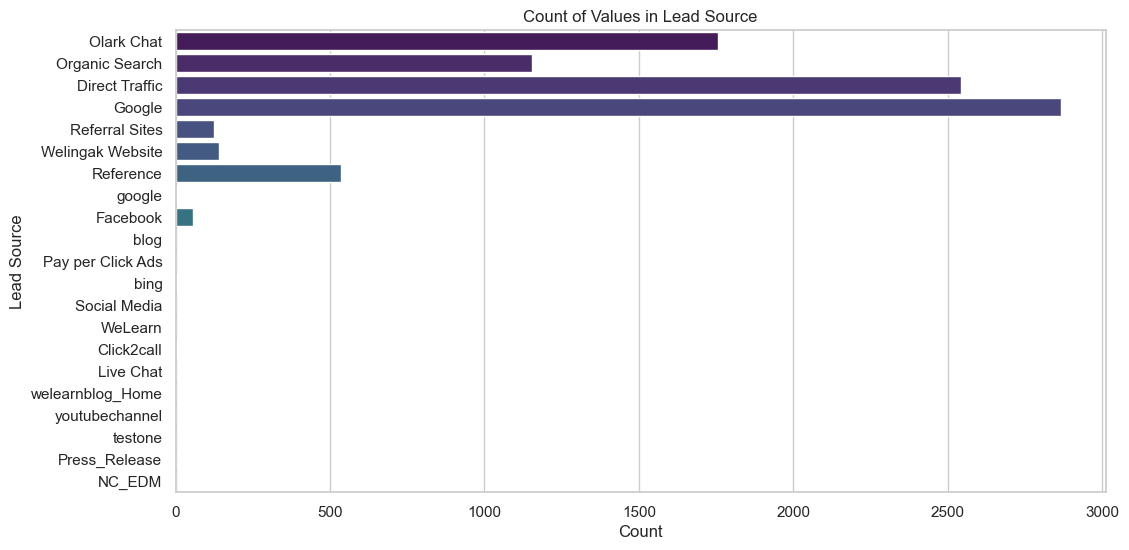

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# List of columns to plot
columns_to_plot = ['Tags', 'Lead Profile', 'What matters most to you in choosing a course',
                   'What is your current occupation', 'Country', 'How did you hear about X Education',
                   'Specialization', 'City', 'Last Activity', 'Lead Source']

# Plot count plots for each specified column
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[column], palette='viridis')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.title(f'Count of Values in {column}')
    plt.show()

# Insight from the graph
.


###  Tags column as many data that has the same meaning,
## club them acording to thier meaning to form a negative nuetral and positve group.

In [13]:
# Display unique values in the "Tags" column
unique_tags = df['Tags'].unique()
print("Unique values in Tags:")
print(unique_tags)

Unique values in Tags:
['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


In [14]:
# Define a function to categorize tags
def categorize_tags(tag):
    positive_tags = ['Will revert after reading the email', 'In confusion whether part-time or DLP', 'in touch with EINS', 'Already a student', 'Closed by Horizzon', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch']
    negative_tags = ['Lost to EINS', 'Busy', 'switched off', 'Diploma holder (Not Eligible)', 'Graduation in progress', 'number not provided', 'opp hangup', 'Not doing further education', 'invalid number', 'wrong number given', 'Lost to Others', 'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 'University not recognized']
    
    if tag in positive_tags:
        return 'Positive'
    elif tag in negative_tags:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column "Tags_Category"
df['Tags_Category'] = df['Tags'].apply(categorize_tags)

# Display the updated DataFrame
print(df[['Tags', 'Tags_Category']].head())

                                  Tags Tags_Category
0          Interested in other courses       Neutral
1                              Ringing       Neutral
2  Will revert after reading the email      Positive
3                              Ringing       Neutral
4  Will revert after reading the email      Positive


In [15]:
# Replace the existing "Tags" column with the new "Tags_Category" column
df['Tags'] = df['Tags_Category']

# Drop the temporary "Tags_Category" column if you no longer need it
df = df.drop(columns=['Tags_Category'])


### "Lead Profile" has lot of has select ,which gives a notion of value being null, hence the column will be dropped 

In [16]:
# Show the percentage of counts for each value in the "Lead Profile" column
lead_profile_percentage = (df['Lead Profile'].value_counts() / len(df)) * 100
print(lead_profile_percentage)

Lead Profile
Select                         44.870130
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: count, dtype: float64


In [17]:
# Drop the "Lead Profile" column
df = df.drop(columns=['Lead Profile'])

### "What matters most to you in choosing a course" the data is baised having more weightage to better prospect,as biased data wont be good for the model let us drop it.

In [18]:
course_choice_percentage = (df['What matters most to you in choosing a course'].value_counts() / len(df)) * 100
print(course_choice_percentage)

What matters most to you in choosing a course
Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: count, dtype: float64


In [19]:
# Drop the "What matters most to you in choosing a course" column
df = df.drop(columns=['What matters most to you in choosing a course'])


In [20]:
# From the graph column"country" has majoity value as India ,also  we have a cloumn as City, hence we drop the country column

In [21]:
# Drop the 'Country' column
df = df.drop(columns=['Country'])


In [22]:
# Check distinct values in the 'How did you hear about X Education' column
distinct_values = df['How did you hear about X Education'].unique()

# Display the distinct values
print(distinct_values)

['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']


In [23]:
# Group similar values in 'How did you hear about X Education'
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(['Select', 'Other', np.nan], 'Not Specified')

# Display unique values after grouping
print(df['How did you hear about X Education'].unique())

['Not Specified' 'Word Of Mouth' 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']


In [24]:
# Calculate value counts in percentage
value_counts_percentage = (df['How did you hear about X Education'].value_counts(normalize=True) * 100).reset_index()

# Rename the columns for clarity
value_counts_percentage.columns = ['How did you hear', 'Percentage']

# Display the result
print(value_counts_percentage)

        How did you hear  Percentage
0          Not Specified   80.476190
1          Online Search    8.744589
2          Word Of Mouth    3.766234
3  Student of SomeSchool    3.354978
4       Multiple Sources    1.645022
5         Advertisements    0.757576
6           Social Media    0.725108
7                  Email    0.281385
8                    SMS    0.248918


In [25]:
###  Here 80% of data has no clarity, hence we drop this column.

In [26]:
# Drop the 'How did you hear about X Education' column
df = df.drop(columns=['How did you hear about X Education'])

In [27]:
# Display unique values of the 'City' column
print(df['City'].unique())

['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']


In [28]:
# Replace similar values in the 'City' column
df['City'] = df['City'].replace(['Select', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'], 'Other Cities')


In [29]:
# Calculate the percentage of each value in the 'City' column
city_percentage = (df['City'].value_counts() / len(df['City'])) * 100

# Display the percentage of each value
print(city_percentage)


City
Other Cities          45.649351
Mumbai                34.870130
Other Metro Cities     4.112554
Name: count, dtype: float64


In [30]:
# Replace NaN values in 'City' column with 'Other Cities'
df['City'] = df['City'].fillna('Other Cities')

In [31]:
# Impute the missing values of Last activity as Email opened, as it is the max in the column

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

In [32]:
# Fill the missing values of lead source as Unknown

df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Unknown')

In [33]:
df["Specialization"].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

###  Clubing the different classes togather based on real world sector names and replace the null values with "Not Specified"

In [34]:
df['Specialization'] = df['Specialization'].replace({
    'Business Administration': 'Business',
    'Media and Advertising': 'Media and Communication',
    'Supply Chain Management': 'Management',
    'IT Projects Management': 'Information Technology',
    'Finance Management': 'Finance',
    'Travel and Tourism': 'Hospitality and Tourism',
    'Human Resource Management': 'Human Resources',
    'Marketing Management': 'Marketing',
    'Banking, Investment And Insurance': 'Finance',
    'International Business': 'Business',
    'E-COMMERCE': 'Information Technology',
    'Operations Management': 'Management',
    'Retail Management': 'Retail',
    'Services Excellence': 'Services',
    'Hospitality Management': 'Hospitality and Tourism',
    'Rural and Agribusiness': 'Agriculture',
    'Healthcare Management': 'Healthcare',
    'E-Business': 'Information Technology'
})

# Replace 'Select' and nan with a common category (e.g., 'Not Specified')
df['Specialization'] = df['Specialization'].replace({'Select': 'Not Specified', np.nan: 'Not Specified'})

In [35]:
df["Specialization"].unique()

array(['Not Specified', 'Business', 'Media and Communication',
       'Management', 'Information Technology', 'Finance',
       'Hospitality and Tourism', 'Human Resources', 'Marketing',
       'Retail', 'Services', 'Agriculture', 'Healthcare'], dtype=object)

In [36]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

What is your current occupation           29.112554
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Prospect ID                                0.000000
Search                                     0.000000
A free copy of Mastering The Interview     0.000000
City                                       0.000000
Tags                                       0.000000
Through Recommendations                    0.000000
Digital Advertisement                      0.000000
Newspaper                                  0.000000
X Education Forums                         0.000000
Newspaper Article                          0.000000
Specialization                             0.000000
Lead Number                                0.000000
Last Activity                              0.000000
Total Time Spent on Website                0.000000
Converted                                  0.000000
Do Not Call                                0.000000
Do Not Email

In [37]:
# Replace null values in 'What is your current occupation' with 'Others'
df['What is your current occupation'].fillna('Others', inplace=True)

##  Numerical column

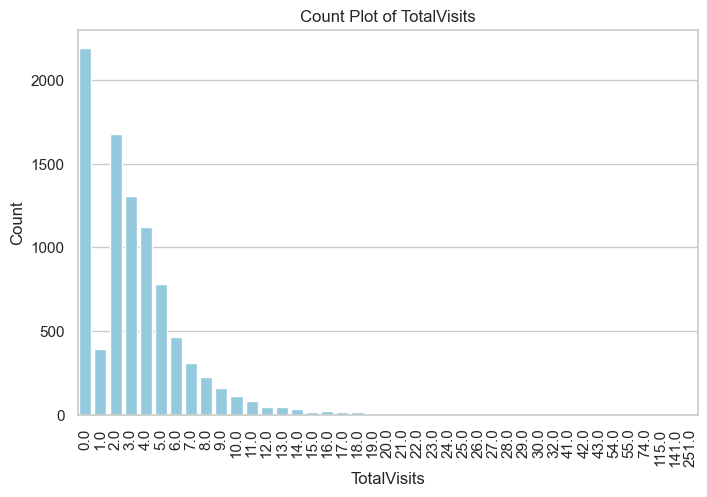

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(8, 5))

# Plot count plot for TotalVisits
sns.countplot(data=df, x='TotalVisits', color='skyblue')

# Set plot title and labels
plt.title('Count Plot of TotalVisits')
plt.xlabel('TotalVisits')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [39]:
# Check the percentage of rows retained
percentage_retained = (len(df.index) / 9240) * 100
print(f"Percentage of rows retained: {percentage_retained:.2f}%")

Percentage of rows retained: 100.00%


In [40]:
# Drop rows with null values in specified columns
df = df.dropna(subset=['TotalVisits', 'Page Views Per Visit'])


In [41]:
# Display unique values in each column of the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in Prospect ID:
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Unique values in Lead Number:
[660737 660728 660727 ... 579545 579538 579533]

Unique values in Lead Origin:
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

Unique values in Lead Source:
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'Unknown' 'WeLearn'
 'Click2call' 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone'
 'Press_Release' 'NC_EDM']

Unique values in Do Not Email:
['No' 'Yes']

Unique values in Do Not Call:
['No' 'Yes']

Unique values in Converted:
[0 1]

Unique values in TotalVisits:
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.

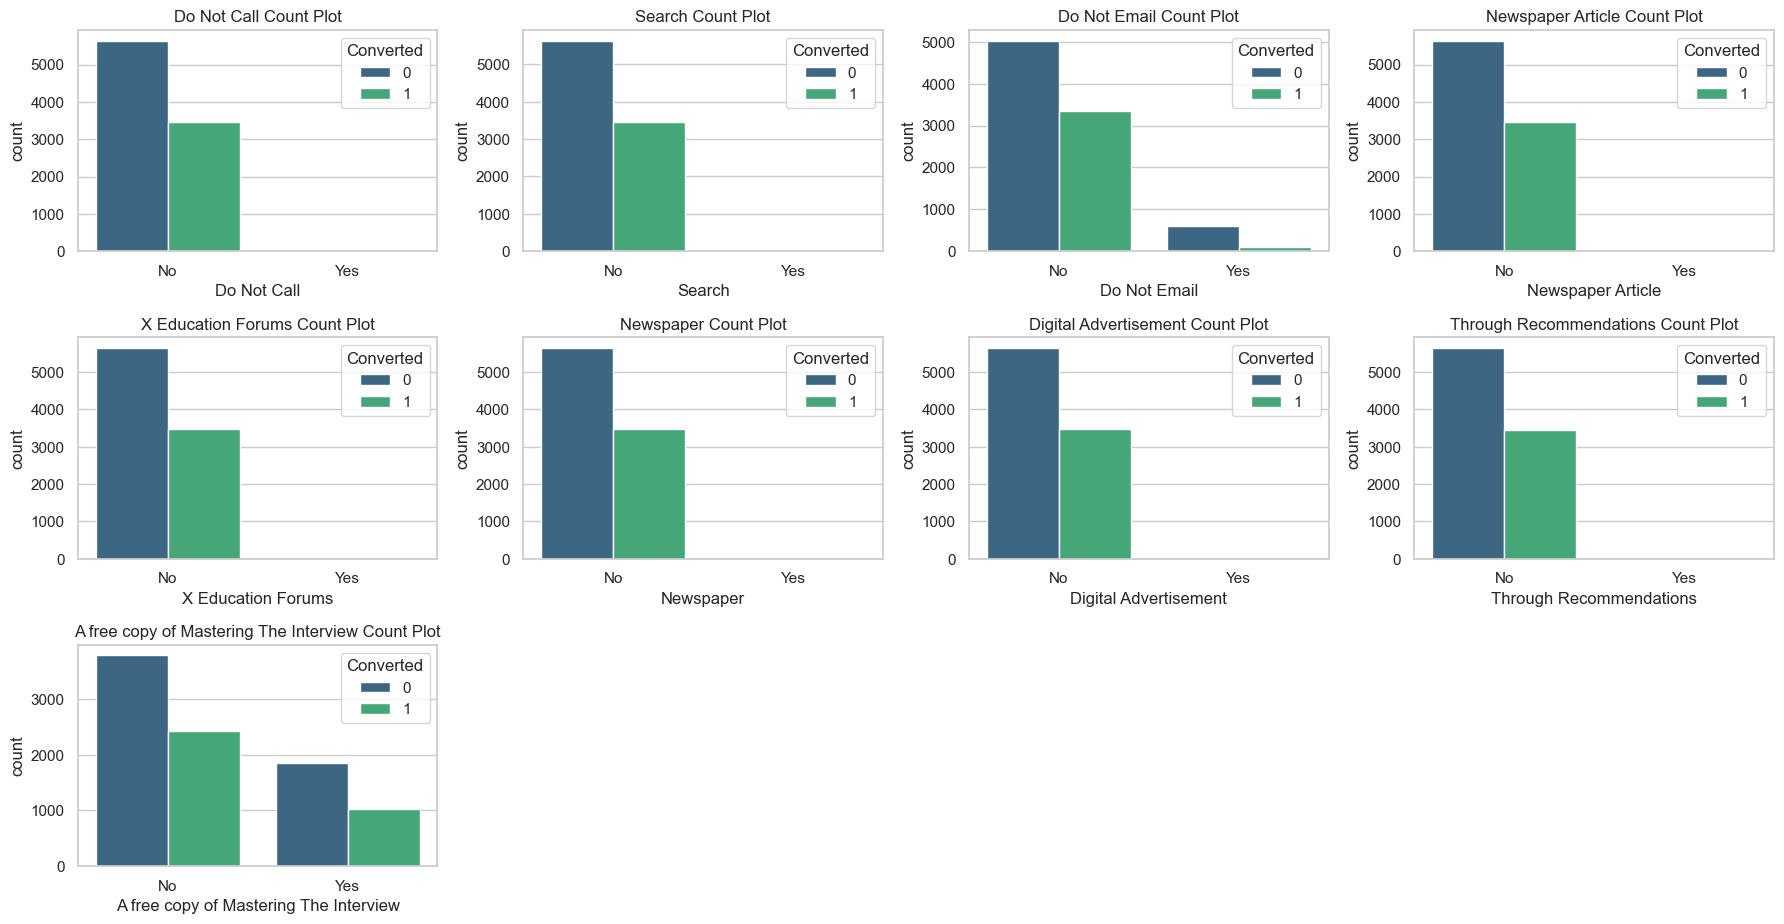

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns with 'Yes'/'No' or 1/0 values
binary_columns = ['Do Not Call', 'Search','Do Not Email', 'Newspaper Article',
                   'X Education Forums', 'Newspaper', 'Digital Advertisement',
                   'Through Recommendations','A free copy of Mastering The Interview']

# Set up the plot
plt.figure(figsize=(18, 12))

# Plot count plots for each binary column
for i, column in enumerate(binary_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=column, hue='Converted', palette='viridis')
    plt.title(f'{column} Count Plot')

plt.tight_layout()
plt.show()

## As seen in the graph 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', have most of the rows as NO, better drop them as data is skwed.

In [43]:
# List of columns to drop
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article',
                   'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [44]:
pd.set_option('display.max_columns', None)
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Neutral,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Neutral,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business,Student,Positive,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Communication,Unemployed,Neutral,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Positive,Mumbai,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not Specified,Others,Neutral,Other Cities,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management,Unemployed,Positive,Mumbai,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not Specified,Others,Neutral,Other Cities,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,Information Technology,Others,Neutral,Other Cities,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,0,4.0,58,4.0,Email Opened,Finance,Others,Neutral,Mumbai,No,Email Opened


In [45]:
df.shape

(9103, 16)

In [46]:
# Drop 'Lead Number' and 'Prospect ID' columns
#As these values wont be usefull for our model
df.drop(columns=['Lead Number', 'Prospect ID'], inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

# EDA

## Univariate Analysis:

### Distribution of Converted Leads:Univariate analysis of the target variable 'Converted'.

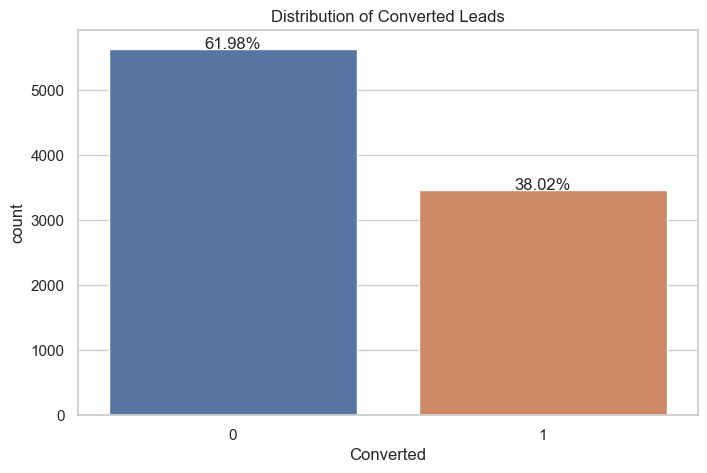

In [48]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a countplot
ax = sns.countplot(x='Converted', data=df)

# Add percentage annotations on top of each bar
total = len(df['Converted'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height / total * 100:.2f}%', ha="center")

# Set the title
plt.title('Distribution of Converted Leads')

# Show the plot
plt.show()

#### As seen in the graph,most of the leads were not converted, 


###  Univariate analysis of numerical features 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'.

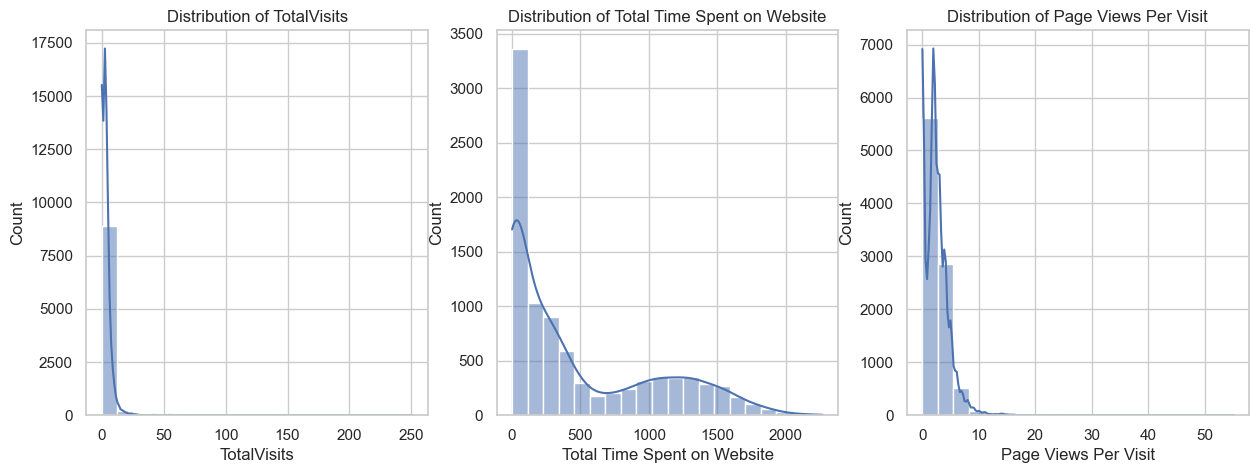

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TotalVisits'], bins=20, kde=True)
plt.title('Distribution of TotalVisits')

plt.subplot(1, 3, 2)
sns.histplot(df['Total Time Spent on Website'], bins=20, kde=True)
plt.title('Distribution of Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.histplot(df['Page Views Per Visit'], bins=20, kde=True)
plt.title('Distribution of Page Views Per Visit')

plt.show()


#### As seen in  the graph the most of the value is 0, in "total visit" and "page view per visit",Most of the prospects had not visited the site,or viewed ,These two column  are more likely to be highly corelated.
#### There are also outlier in total visit,as value has gone from 0 to 250.Lets verify.


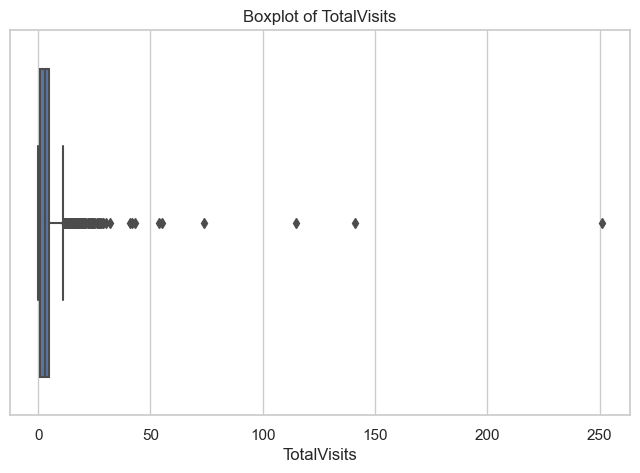

In [50]:
# Create a boxplot for 'TotalVisits'
plt.figure(figsize=(8, 5))
sns.boxplot(x='TotalVisits', data=df)
plt.title('Boxplot of TotalVisits')
plt.show()



#### From the boxpot,it is clear that there are outliers that needs to be handled.

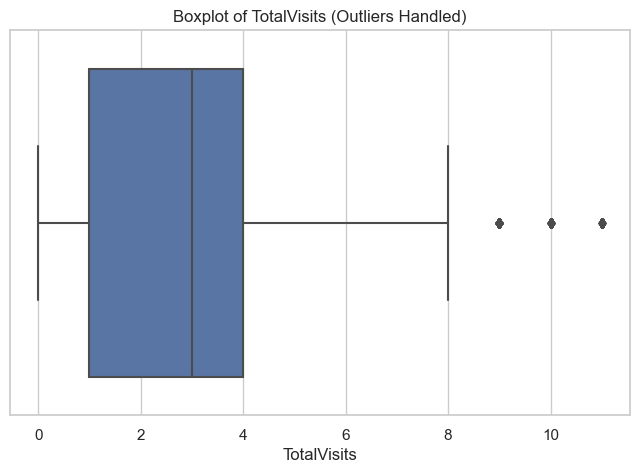

In [51]:
# Calculate IQR for TotalVisits
Q1_total_visits = df['TotalVisits'].quantile(0.25)
Q3_total_visits = df['TotalVisits'].quantile(0.75)
IQR_total_visits = Q3_total_visits - Q1_total_visits

# Define upper and lower bounds for TotalVisits
upper_bound_total_visits = Q3_total_visits + 1.5 * IQR_total_visits
lower_bound_total_visits = Q1_total_visits - 1.5 * IQR_total_visits

# Replace outliers with median for TotalVisits
df['TotalVisits'] = np.where((df['TotalVisits'] < lower_bound_total_visits) | (df['TotalVisits'] > upper_bound_total_visits),
                             df['TotalVisits'].median(), df['TotalVisits'])

# Verify the changes
plt.figure(figsize=(8, 5))
sns.boxplot(x='TotalVisits', data=df)
plt.title('Boxplot of TotalVisits (Outliers Handled)')
plt.show()

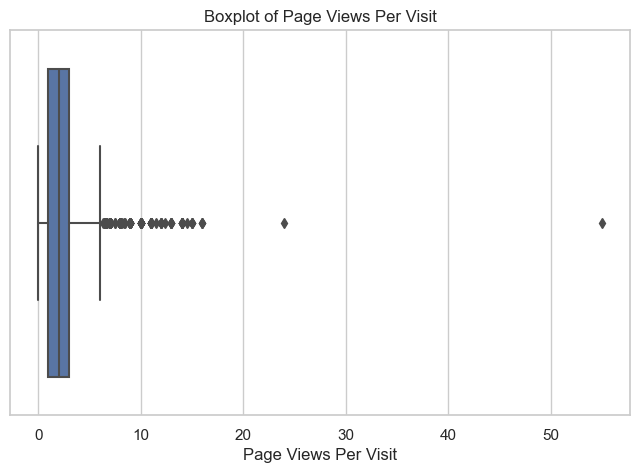

In [52]:
# Create a boxplot for 'Page Views Per Visit'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Page Views Per Visit', data=df)
plt.title('Boxplot of Page Views Per Visit')
plt.show()

### Handlng the outliers in "page views per visit".

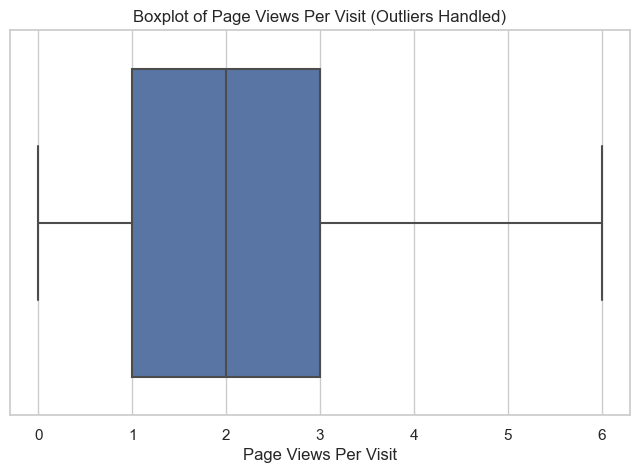

In [53]:
# Calculate IQR
Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with median
df['Page Views Per Visit'] = np.where((df['Page Views Per Visit'] < lower_bound) | (df['Page Views Per Visit'] > upper_bound),
                                      df['Page Views Per Visit'].median(), df['Page Views Per Visit'])

# Verify the changes
plt.figure(figsize=(8, 5))
sns.boxplot(x='Page Views Per Visit', data=df)
plt.title('Boxplot of Page Views Per Visit (Outliers Handled)')
plt.show()

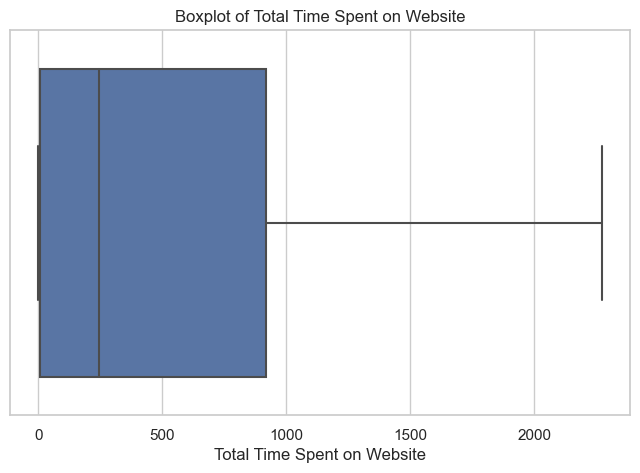

In [54]:
##Check for outlier in  'Total Time Spent on Website'.

plt.figure(figsize=(8, 5))
sns.boxplot(x='Total Time Spent on Website', data=df)
plt.title('Boxplot of Total Time Spent on Website')
plt.show()

### Analysing the categorical columns

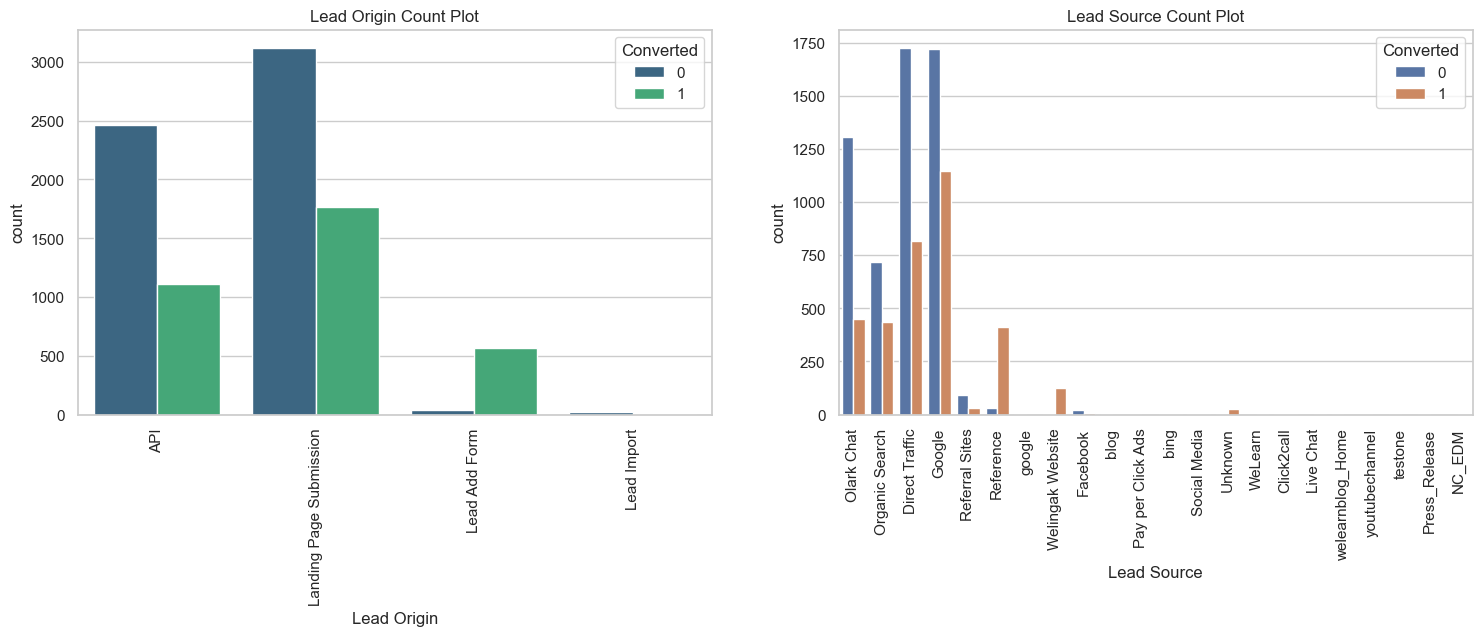

In [55]:


# Set the figure size
plt.figure(figsize=(18, 5))

# Subplot 1: Lead Origin Count Plot
plt.subplot(121)
plt.title("Lead Origin Count Plot")
sns.countplot(data=df, x='Lead Origin', hue='Converted', palette='viridis')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability

# Subplot 2: Lead Source Count Plot
plt.subplot(122)
plt.title("Lead Source Count Plot")
sns.countplot(data=df, x='Lead Source', hue='Converted')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability

plt.show()

## Insight

### 'Google' ,Direct Traffic' is the best lead source ,followed by `Olark Chat` and `Organic Search`.,And percentage coversion of leads is less in Olark Cha
### Most of the leads originated from `Landing Page Submission` followed by `API`

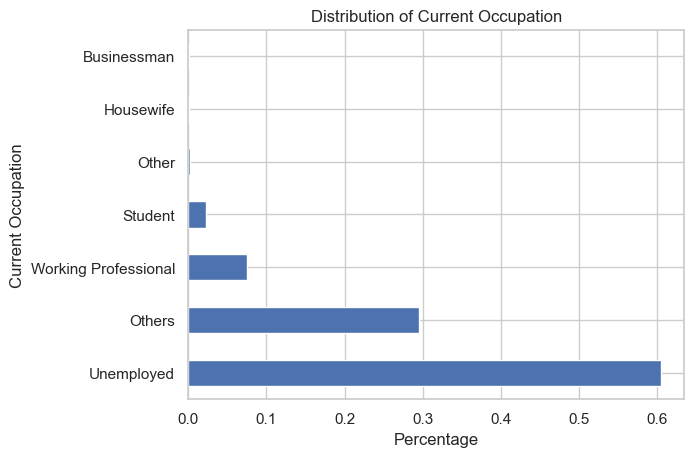

In [56]:
# Create a bar plot for normalized value counts
df["What is your current occupation"].value_counts(normalize=True).plot.barh()

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Current Occupation')
plt.title('Distribution of Current Occupation')

# Show the plot
plt.show()

### Most of the lead were "unemployed".Might be the reson  that they want to upskill.

### Bivariate  analysis

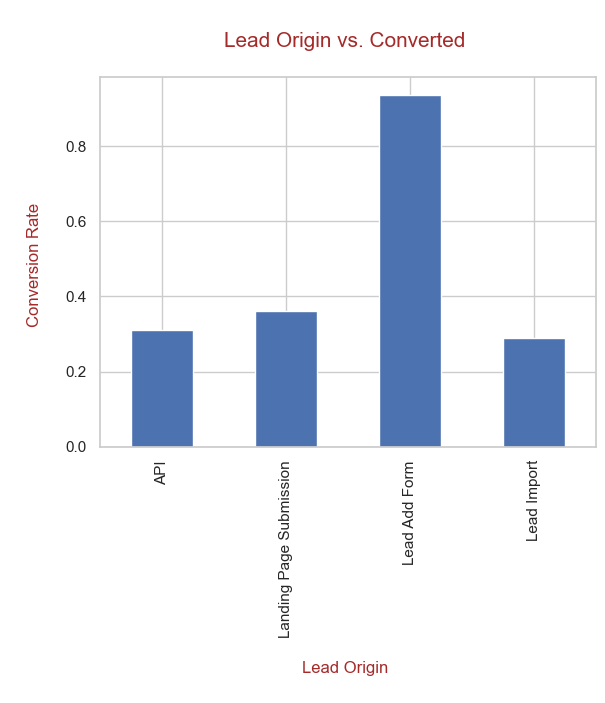

In [57]:
# Bar plot to visualize the conversion rate based on different lead origins. 
# This helps in understanding how the lead origin is associated with the likelihood of conversion
df.groupby("Lead Origin")["Converted"].mean().plot.bar()
plt.title("\nLead Origin vs. Converted \n", fontsize=15, color="brown")
plt.xlabel("\nLead Origin \n", fontsize=12, color="brown")
plt.ylabel("\nConversion Rate \n", fontsize=12, color="brown")
plt.show()


####  Lead originated from `Add Form` are more likely to be converted

### Visualize the conversion rate with respect to 'Lead Source' and 'Current Occupation

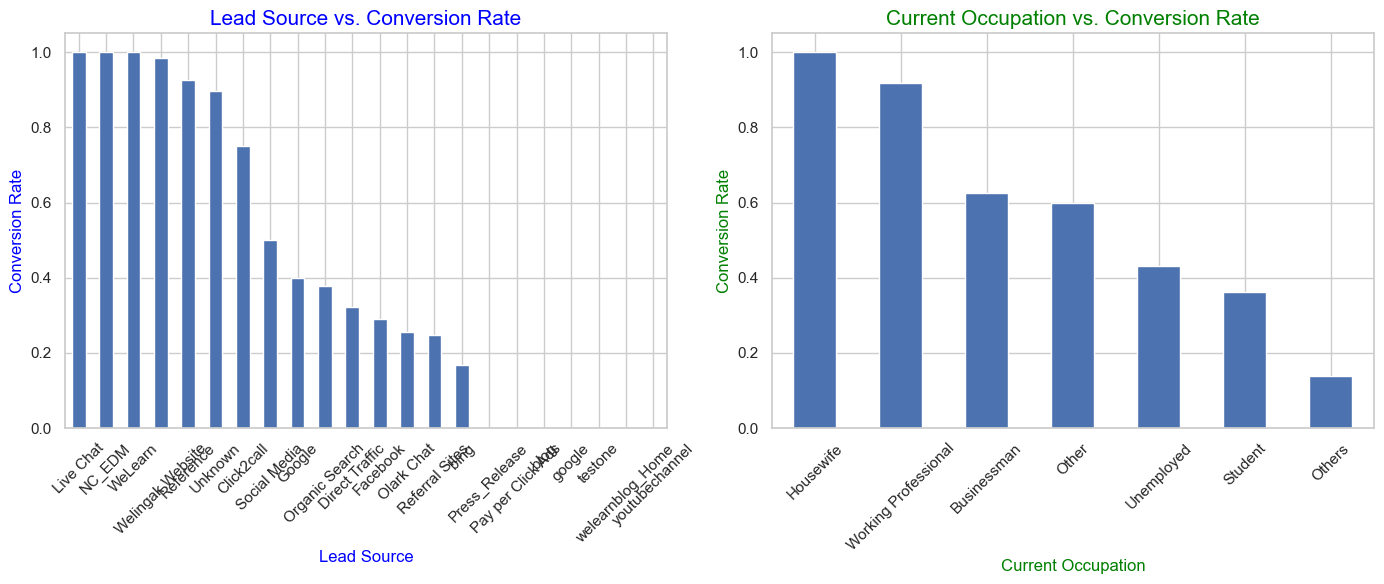

In [58]:
# Conversion rate vs Lead Source
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df.groupby("Lead Source")["Converted"].mean().sort_values(ascending=False).plot.bar()
plt.title("Lead Source vs. Conversion Rate", fontsize=15, color="blue")
plt.xlabel("Lead Source", fontsize=12, color="blue")
plt.ylabel("Conversion Rate", fontsize=12, color="blue")
plt.xticks(rotation=45)

# Conversion rate vs Current Occupation
plt.subplot(1, 2, 2)
df.groupby("What is your current occupation")["Converted"].mean().sort_values(ascending=False).plot.bar()
plt.title("Current Occupation vs. Conversion Rate", fontsize=15, color="green")
plt.xlabel("Current Occupation", fontsize=12, color="green")
plt.ylabel("Conversion Rate", fontsize=12, color="green")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### LEAD SOURCE FROM 'Live Chat','NC_EDM','WeLearn' are most likely to be converted 
### Housewives and Working professionals are more likely to take up the course.

# Dummy Creation

In [59]:
# Identify columns of type 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to categorical
df[object_columns] = df[object_columns].astype('category')

# Display the updated DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9103 non-null   category
 1   Lead Source                             9103 non-null   category
 2   Do Not Email                            9103 non-null   category
 3   Converted                               9103 non-null   int64   
 4   TotalVisits                             9103 non-null   float64 
 5   Total Time Spent on Website             9103 non-null   int64   
 6   Page Views Per Visit                    9103 non-null   float64 
 7   Last Activity                           9103 non-null   category
 8   Specialization                          9103 non-null   category
 9   What is your current occupation         9103 non-null   category
 10  Tags                                    9103 non-null

In [60]:
# List of categorical columns for which dummy variables were created
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
                        'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
                        'Last Notable Activity']

# Create dummy variables for categorical columns
dummy_df = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenate the original dataframe with the dummy variables
df = pd.concat([df, dummy_df], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

# Display the updated DataFrame
print(df.head())

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    Fal

In [61]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business,Specialization_Finance,Specialization_Healthcare,Specialization_Hospitality and Tourism,Specialization_Human Resources,Specialization_Information Technology,Specialization_Management,Specialization_Marketing,Specialization_Media and Communication,Specialization_Not Specified,Specialization_Retail,Specialization_Services,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Neutral,Tags_Positive,City_Other Cities,City_Other Metro Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False

In [62]:
# Replace False with 0 and True with 1 in the entire dataset
df.replace({False: 0, True: 1}, inplace=True)

# Train - Test split

In [63]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Converted', axis=1)  # Features excluding the target variable
y = df['Converted']  # Target variable

# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6372, 82)
X_test shape: (2731, 82)
y_train shape: (6372,)
y_test shape: (2731,)


# Scaling 
### Feature scaling is a crucial step in the preprocessing of data for many machine learning algorithms. It ensures that all features have the same scale, preventing some features from dominating others

In [64]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [65]:
#Checking for correlations

In [66]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
correlation_matrix


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business,Specialization_Finance,Specialization_Healthcare,Specialization_Hospitality and Tourism,Specialization_Human Resources,Specialization_Information Technology,Specialization_Management,Specialization_Marketing,Specialization_Media and Communication,Specialization_Not Specified,Specialization_Retail,Specialization_Services,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Neutral,Tags_Positive,City_Other Cities,City_Other Metro Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.042802,0.354939,-0.004822,-0.040698,0.306224,-0.010824,-0.075079,-0.010824,0.027560,0.018927,0.013383,-0.125395,-0.001874,-0.008209,-0.011611,0.254067,-0.032135,0.003658,0.060132,0.013383,0.149250,-0.011297,-0.008209,-0.018361,-0.008209,-0.008209,-0.008209,-0.136553,-0.116238,-0.127649,-0.038243,0.018927,-0.025097,0.018927,-0.032491,0.045382,-0.209246,-0.081726,0.013383,0.338020,-0.011936,-0.019950,-0.011297,-0.008209,0.017101,0.062071,0.030085,-0.003731,0.048835,-0.002917,0.047815,0.066812,0.011059,-0.158220,-0.008729,-0.014398,0.040166,0.018395,-0.322672,-0.005620,0.128250,0.315113,-0.494617,0.595264,-0.037567,0.012111,-0.033079,-0.038628,-0.034432,0.018927,-0.015081,0.013383,-0.008209,0.044335,-0.264267,-0.071874,-0.034393,0.013383,0.362200,0.037599,-0.012218,-0.008209
TotalVisits,0.042802,1.000000,0.367107,0.686108,0.464754,-0.293705,-0.062668,0.130131,-0.059704,0.251662,-0.017396,0.016534,-0.515717,0.283263,0.000057,0.008820,-0.246950,0.084114,-0.002832,-0.064807,-0.004062,-0.134119,-0.008270,0.004177,0.024082,0.008296,-0.004062,0.004177,-0.012110,-0.096473,-0.059239,-0.032820,0.005907,0.080054,0.014645,0.018713,0.015136,-0.225260,0.162261,-0.012300,0.040121,0.029346,0.015796,0.015280,0.004177,0.100450,0.128829,0.044166,0.086090,0.093282,0.072466,0.087251,0.059356,0.069406,-0.408310,0.041167,0.027777,-0.006696,0.025768,-0.072301,-0.028992,0.073611,0.000571,-0.064907,0.021783,-0.301254,0.070690,0.282200,-0.008090,-0.018524,0.005907,0.094178,

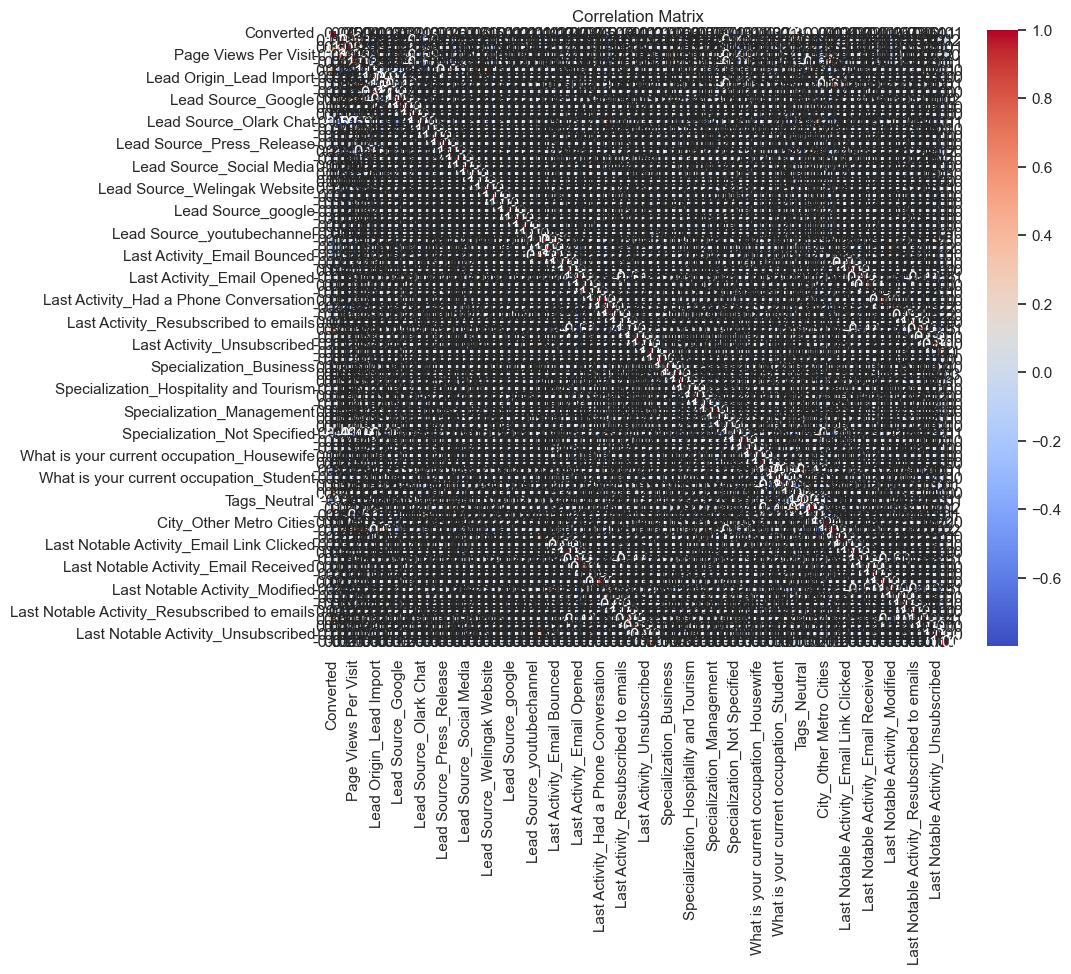

In [67]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### We have too many variables in our data to work with effectively. Let's use Recursive Feature Elimination (RFE) to identify a smaller, more manageable set of important features.

# Model building

In [68]:
# Import required libraries

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE

In [70]:
# Use RFE to select 15 features
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train_scaled, y_train)

In [71]:
# Get the columns selected by RFE
selected_columns = X_train.columns[rfe.support_]

# Display the top 15 features
print("Top 15 Features:")
print(selected_columns)

Top 15 Features:
Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional', 'Tags_Neutral',
       'Tags_Positive', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [72]:

import statsmodels.api as sm

# Add a constant to the selected features
X_train_rfe_const = sm.add_constant(X_train[selected_columns])

In [73]:
# Fit an Ordinary Least Squares (OLS) model on X_train_rfe_const
ols_model = sm.OLS(y_train, X_train_rfe_const)
ols_result = ols_model.fit()

# Display the summary
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     518.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:57:18   Log-Likelihood:                -1888.0
No. Observations:                6372   AIC:                             3808.
Df Residuals:                    6356   BIC:                             3916.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Insight 
R-squared and Adjusted R-squared: The R-squared and Adjusted R-squared values are 0.550 and 0.549, respectively. These values indicate that the model explains around 55% of the variance in the dependent variable.

F-statistic and Prob (F-statistic): The F-statistic is 518.6, and the corresponding probability (Prob F-statistic) is very close to zero. This suggests that the overall model is statistically significant.

Coefficients:

Intercept (const): The intercept is 0.1223, indicating the estimated conversion rate when all other variables are zero.

TotalVisits: An increase in the total number of visits is associated with a positive change in the probability of conversion.

Total Time Spent on Website: More time spent on the website is associated with a positive change in the probability of conversion.

Lead Origin, Lead Source, Do Not Email, Last Activity, Current Occupation, Tags, and Last Notable Activity: Specific categories within these variables have significant coefficients, affecting the conversion probability.

P-values: The p-values for most of the coefficients are very low (close to zero), suggesting that these features are statistically significant in predicting the conversion outcome



# Variance Inflation Factor (VIF) for the features in the model.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the selected columns
X_train_vif = X_train[selected_columns]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display the VIF values
print(vif_data)


                                              Feature       VIF
0                                         TotalVisits  3.470502
1                         Total Time Spent on Website  2.311453
2                 Lead Origin_Landing Page Submission  3.052478
3                           Lead Origin_Lead Add Form  1.814742
4                              Lead Source_Olark Chat  2.063327
5                        Lead Source_Welingak Website  1.349623
6                                    Do Not Email_Yes  1.103465
7                     Last Activity_Converted to Lead  1.090285
8               Last Activity_Olark Chat Conversation  1.426417
9           What is your current occupation_Housewife  1.005957
10            What is your current occupation_Student  1.065939
11  What is your current occupation_Working Profes...  1.285104
12                                       Tags_Neutral  3.360650
13                                      Tags_Positive  2.982366
14                     Last Notable Acti

In [75]:
##The VIF values for all the features are relatively low, indicating low multicollinearity among the predictors. Typically, 
#VIF values below 5 are considered acceptable.
#In this case, all features have VIF values well below that threshold.

# Model evaluation

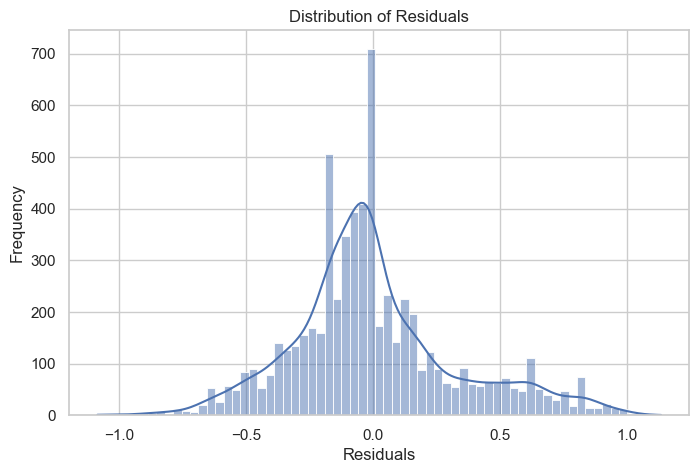

In [76]:

# Predict the target variable on the training set
y_train_pred = ols_result.predict(X_train_rfe_const)

# Calculate the residuals
residuals = y_train - y_train_pred

# Plot the histogram of the residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Errors are normal distributed, assumption holds true

In [77]:
# probabilities on the train set
y_train_pred[:10]

7962    0.618347
5520    0.119644
1962    0.132127
1566    0.906867
9170    0.644668
5097    0.167084
8954    0.312599
309     0.550129
5519    0.383129
1050    0.738219
dtype: float64

In [78]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61834697, 0.11964411, 0.13212749, 0.90686665, 0.64466782,
       0.16708409, 0.31259901, 0.55012863, 0.38312912, 0.73821911])

In [79]:
# Create a new dataframe containing the actual conversion flag and 
# the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted': y_train, 'Converted_prob': ols_result.predict()})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
7962,0,0.618347,7962
5520,0,0.119644,5520
1962,0,0.132127,1962
1566,1,0.906867,1566
9170,0,0.644668,9170
5097,0,0.167084,5097
8954,0,0.312599,8954
309,1,0.550129,309
5519,1,0.383129,5519
1050,1,0.738219,1050


In [80]:
# Add 'Predicted' column based on a threshold of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the updated dataframe
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
7962,0,0.618347,7962,1
5520,0,0.119644,5520,0
1962,0,0.132127,1962,0
1566,1,0.906867,1566,1
9170,0,0.644668,9170,1


In [81]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [82]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
# Converted vs Predicted cols


[[3673  280]
 [ 625 1794]]


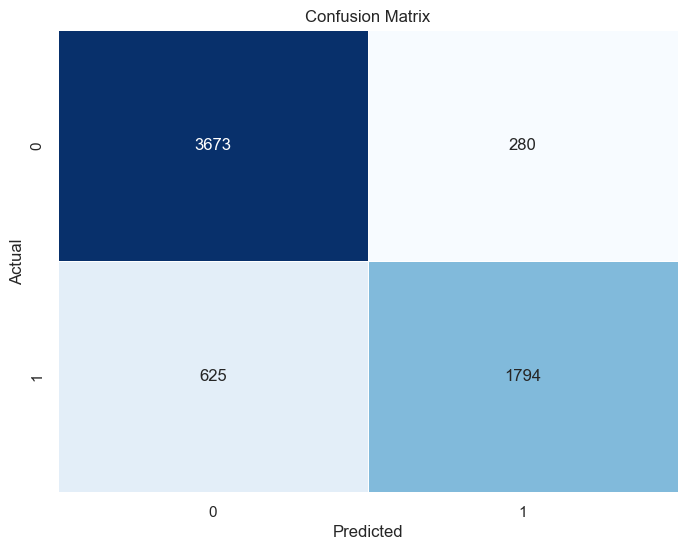

In [83]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Calculate performance metrics
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

# Accuracy
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Sensitivity/Recall/True Positive Rate
recall = TP / float(TP + FN)

# Specificity/True Negative Rate
specificity = TN / float(TN + FP)

# Precision/Positive Predictive Value
precision = TP / float(TP + FP)

# Negative Predictive Value
npv = TN / float(TN + FN)

# False Positive Rate
fpr = FP / float(FP + TN)

# False Negative Rate
fnr = FN / float(TP + FN)

# F1 Score
f1_score = (2 * precision * recall) / (precision + recall)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Sensitivity/Recall/True Positive Rate:", recall)
print("Specificity/True Negative Rate:", specificity)
print("Precision/Positive Predictive Value:", precision)
print("Negative Predictive Value:", npv)
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)
print("F1 Score:", f1_score)


Accuracy: 0.8579723791588199
Sensitivity/Recall/True Positive Rate: 0.7416287722199256
Specificity/True Negative Rate: 0.9291677207184417
Precision/Positive Predictive Value: 0.8649951783992286
Negative Predictive Value: 0.8545835272219637
False Positive Rate: 0.07083227928155832
False Negative Rate: 0.25837122778007443
F1 Score: 0.7985755619853104


### The performance metrics for your model based on the confusion matrix are as follows:

Accuracy: 85.80%

Sensitivity/Recall/True Positive Rate: 74.16%

Specificity/True Negative Rate: 92.92%

Precision/Positive Predictive Value: 86.50%

Negative Predictive Value: 85.46%

False Positive Rate: 7.08%

False Negative Rate: 25.84%

F1 Score: 79.86%

## Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results,we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get

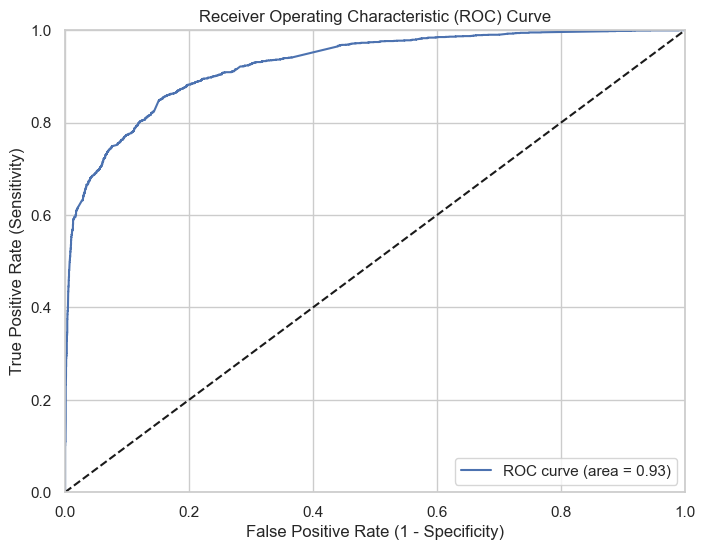

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### A ROC AUC (Receiver Operating Characteristic Area Under the Curve) of 0.93 is indicative of a good model performance. 
### The ROC AUC score measures the ability of the model to distinguish between positive and negative instances. 

In [86]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.618347,7962,1,1,1,1,1,1,1,1,0,0,0
5520,0,0.119644,5520,0,1,1,0,0,0,0,0,0,0,0
1962,0,0.132127,1962,0,1,1,0,0,0,0,0,0,0,0
1566,1,0.906867,1566,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.644668,9170,1,1,1,1,1,1,1,1,0,0,0


In [87]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(
        y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0]+cm1[1, 1])/total1

    speci = cm1[0, 0]/(cm1[0, 0]+cm1[0, 1])
    sensi = cm1[1, 1]/(cm1[1, 0]+cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.451820  0.997933  0.117632
0.1   0.1  0.646265  0.978090  0.443208
0.2   0.2  0.767577  0.935097  0.665065
0.3   0.3  0.821092  0.894998  0.775866
0.4   0.4  0.846673  0.811079  0.868454
0.5   0.5  0.857972  0.741629  0.929168
0.6   0.6  0.851695  0.665978  0.965343
0.7   0.7  0.832078  0.578338  0.987351
0.8   0.8  0.794099  0.467962  0.993676
0.9   0.9  0.732580  0.299711  0.997470


Here's what each column represents:

prob: Probability cutoff

accuracy: Overall accuracy of the model 

sensi: Sensitivity (True Positive Rate), which measures the ability to correctly identify positives 

speci: Specificity (True Negative Rate), which measures the ability to correctly identify negatives 

You can choose the probability cutoff that aligns with your specific goals and requirements. For instance, if you prioritize minimizing false positives (maximizing specificity), you might opt for a higher probability cutoff. Conversely, if you want to capture more positives (maximize sensitivity), you might choose a lower probability cutoff. It's a trade-off, and the optimal cutoff depends on the specific context and consequences of false positives and false negatives in your application

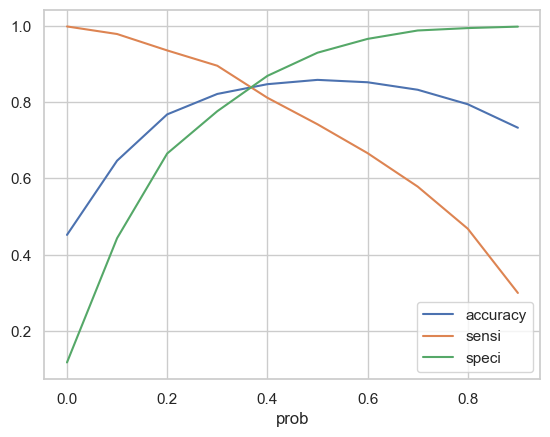

In [88]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff now.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(
    lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7962,0,0.618347,7962,1,1,1,1,1,1,1,1,0,0,0,1
5520,0,0.119644,5520,0,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.132127,1962,0,1,1,0,0,0,0,0,0,0,0,0
1566,1,0.906867,1566,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.644668,9170,1,1,1,1,1,1,1,1,0,0,0,1


In [90]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
7962,0,0.618347,7962,1,62
5520,0,0.119644,5520,0,12
1962,0,0.132127,1962,0,13
1566,1,0.906867,1566,1,91
9170,0,0.644668,9170,1,64


In [91]:
#Checking confusion matrix and Accuracy values
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Confusion Matrix:")
print(confusion)

# Accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Accuracy:", accuracy)


Confusion Matrix:
[[3351  602]
 [ 366 2053]]
Accuracy: 0.8480853735091023


#### This cutoff point seems good to go!

# Model prediction



In [92]:

# Add a constant column to the test set
X_test_rfe_const = sm.add_constant(X_test[selected_columns])

# Use the trained OLS model to predict on the test set
y_test_pred = ols_result.predict(X_test_rfe_const)




In [93]:
y_test_pred[:10]

3504    0.098322
4050    1.046525
7201    0.334932
1196    0.105757
8219    0.167450
8747    0.167084
9048    0.383797
6524    0.026208
7693    0.190492
8187    0.568941
dtype: float64

In [94]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [95]:
# Let's see the head

y_pred_1.head()

,0
3504,0.098322
4050,1.046525
7201,0.334932
1196,0.105757
8219,0.167450


In [96]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [97]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [99]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.098322
1,1,1.046525
2,0,0.334932
3,0,0.105757
4,1,0.167450


In [100]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [101]:
# Let's see the head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.098322
1,1,1.046525
2,0,0.334932
3,0,0.105757
4,1,0.167450


In [102]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [103]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.098322,0
1,1,1.046525,1
2,0,0.334932,0
3,0,0.105757,0
4,1,0.167450,0


In [104]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8502380080556573

In [105]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1421,  268],
       [ 141,  901]], dtype=int64)

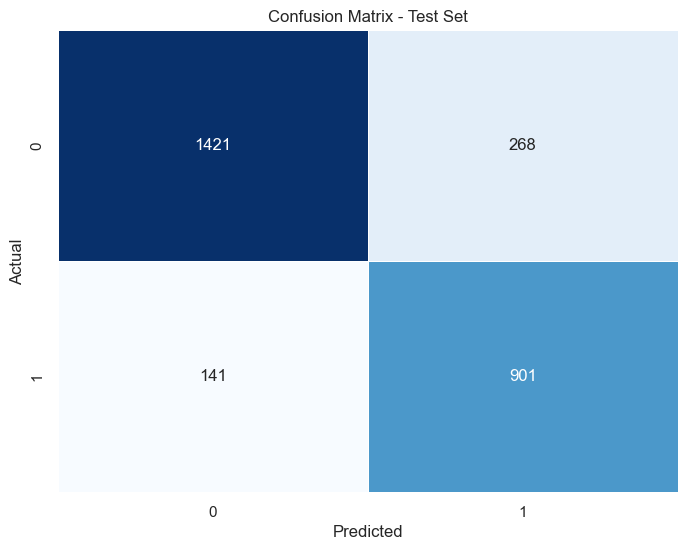

In [106]:
# Create confusion matrix for the test set
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()


In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Accuracy
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Sensitivity/Recall/True Positive Rate
recall = TP / float(TP + FN)

# Specificity/True Negative Rate
specificity = TN / float(TN + FP)

# Precision/Positive Predictive Value
precision = TP / float(TP + FP)

# Negative Predictive Value
npv = TN / float(TN + FN)

# False Positive Rate
fpr = FP / float(FP + TN)



# Print the calculated metrics
print("Accuracy:", accuracy)
print("Sensitivity/Recall/True Positive Rate:", recall)
print("Specificity/True Negative Rate:", specificity)
print("Precision/Positive Predictive Value:", precision)
print("Negative Predictive Value:", npv)


Accuracy: 0.8502380080556573
Sensitivity/Recall/True Positive Rate: 0.8646833013435701
Specificity/True Negative Rate: 0.8413262285375962
Precision/Positive Predictive Value: 0.7707442258340462
Negative Predictive Value: 0.9097311139564661


###  INSIGHT
Accuracy: The proportion of correctly classified instances is 85.02%, indicating the overall correctness of the model.

Sensitivity/Recall/True Positive Rate: The model can identify approximately 86.47% of the actual positive instances, suggesting good performance in capturing leads that actually converted.

Specificity/True Negative Rate: The model has a specificity of around 84.13%, implying it is effective in correctly identifying non-converted leads.

Precision/Positive Predictive Value: Out of the instances predicted as positive, around 77.07% are actually positive. This measures the accuracy of the positive predictions.

Negative Predictive Value: Among instances predicted as negative, approximately 90.97% are genuinely negative. This reflects the accuracy of negative predictions.

In [109]:
#####QUESTION

In [110]:
# Display the summary of the logistic regression model
print(ols_result.summary())

# Extracting coefficients and corresponding feature names
coefficients = ols_result.params[1:]  # Exclude the intercept term
feature_names = X_train_rfe_const.columns[1:]

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values in descending order
top_three_variables = coefficients_df.iloc[coefficients_df['Coefficient'].abs().argsort()[::-1][:3]]

# Display the top three variables
print(top_three_variables)

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     518.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:57:20   Log-Likelihood:                -1888.0
No. Observations:                6372   AIC:                             3808.
Df Residuals:                    6356   BIC:                             3916.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# LEAD SCORE PREDICTOR

In [116]:
# Scale conversion probabilities to lead scores (between 0 and 100)
y_pred_final['Lead_Score'] = (y_pred_final['Conversion_Prob'] * 100).round()

# Sort the DataFrame based on 'Lead_Score' in descending order
lead_score_df = y_pred_final[['Converted', 'Conversion_Prob', 'Lead_Score', 'final_predicted']].sort_values(by='Lead_Score', ascending=False)

# Display the sorted DataFrame
print(lead_score_df)


      Converted  Conversion_Prob  Lead_Score  final_predicted
515           1         1.483418       148.0                1
2108          1         1.417292       142.0                1
1977          1         1.411353       141.0                1
1917          1         1.353817       135.0                1
370           1         1.326541       133.0                1
...         ...              ...         ...              ...
1864          0        -0.200777       -20.0                0
2384          0        -0.208692       -21.0                0
84            0        -0.217156       -22.0                0
2307          0        -0.268476       -27.0                0
1483          0        -0.343445       -34.0                0

[2731 rows x 4 columns]
